In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

Dataset Creation and statistics

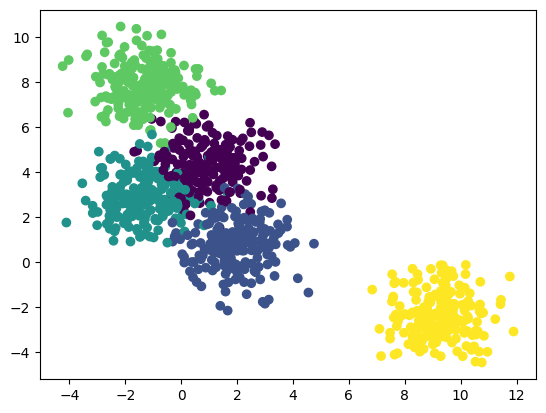

X shape:  (1000, 2)
y shape:  (1000,)
X describe:                   0            1
count  1000.000000  1000.000000
mean      1.877098     2.709972
std       4.021000     3.566142
min      -4.242868    -4.455060
25%      -1.089593     0.097739
50%       0.622473     2.784532
75%       2.826996     4.988671
max      11.893829    10.478395


C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

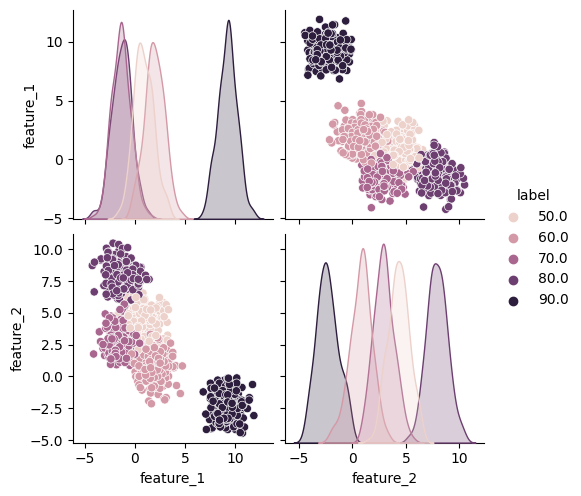

In [3]:
#create sample data
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
X = X.astype(np.float32)
y = y.astype(np.float32)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#statistics of the data
print("X shape: ", X.shape)
print("y shape: ", y.shape)

#describe the data including mean, std, min, max, etc.
print("X describe: ", pd.DataFrame(X).describe())

#give each feature a label, feature_1 and feature_2 and give the target a label, target
features = ["feature_1", "feature_2"]
target = ["label"]

#multiply all the labels by 10 and add 50 to the target
y = y * 10
y = y + 50

#convert the data to a pandas dataframe
dataset = pd.DataFrame(X, columns=features)
dataset[target] = pd.DataFrame(y, columns=target)


sns.pairplot(dataset, hue='label')



Clustering

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

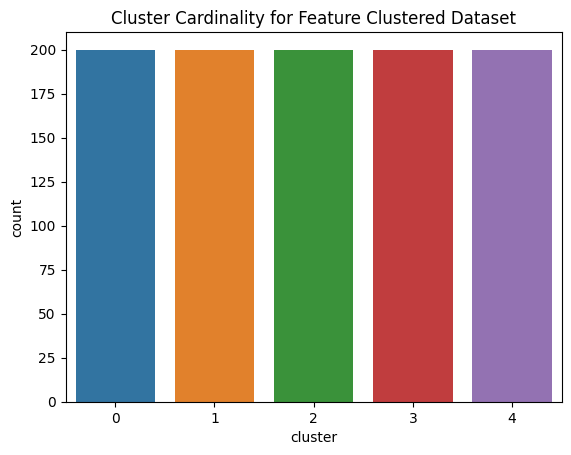

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

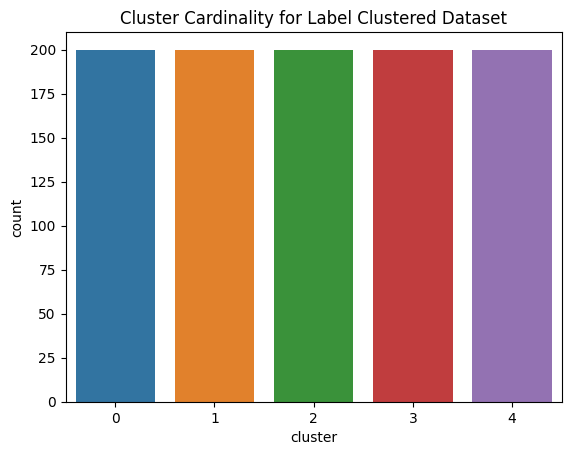

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

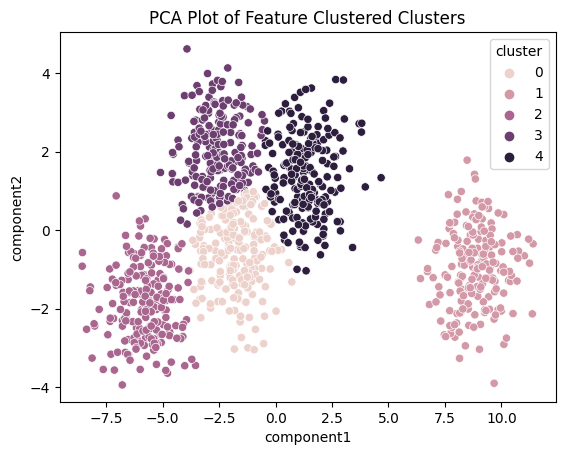

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

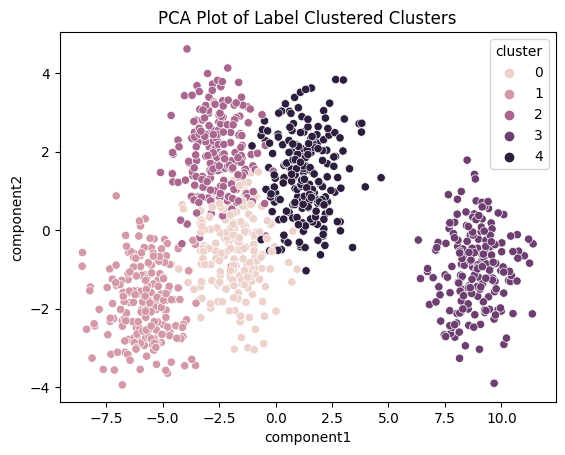

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

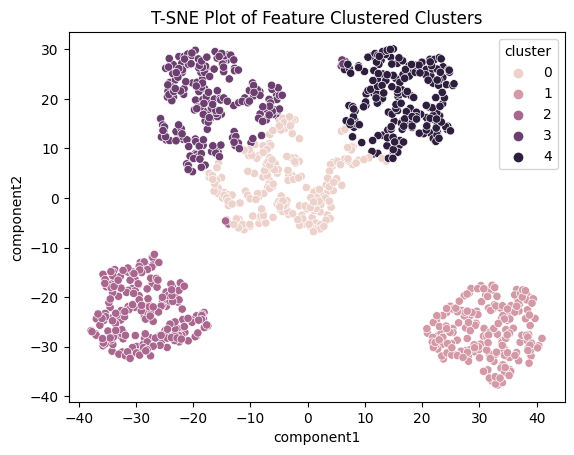

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

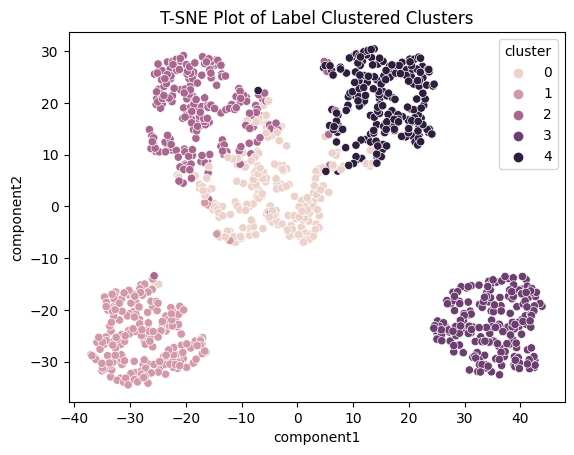

In [4]:
#kmeans clustering
def cluster_dataset_kmeans_features(dataset, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset.drop('label', axis=1).values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

#kmeans clustering on just the label method def
def cluster_dataset_kmeans_label(dataset, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    features = dataset[['label']].values
    clusters = kmeans.fit_predict(features)
    dataset['cluster'] = clusters
    
    return dataset, clusters

# Call the clustering method
n_clusters = 5
feature_clustered_dataset, feature_clustered_clusters = cluster_dataset_kmeans_features(dataset, n_clusters=n_clusters)
label_clustered_dataset, label_clustered_clusters = cluster_dataset_kmeans_label(dataset, n_clusters=n_clusters)

#graph the cardinality of each cluster for the feature clustered dataset and the label clustered dataset
sns.countplot(x='cluster', data=feature_clustered_dataset)
plt.title('Cluster Cardinality for Feature Clustered Dataset')
plt.show()

sns.countplot(x='cluster', data=label_clustered_dataset)
plt.title('Cluster Cardinality for Label Clustered Dataset')
plt.show()

#create a pca plot of the clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = feature_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('PCA Plot of Feature Clustered Clusters')
plt.show()

#same for label clustered clusters
pca = PCA(n_components=2)
components = pca.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = label_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('PCA Plot of Label Clustered Clusters')
plt.show()

#create a T-SNE plot of the clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = feature_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('T-SNE Plot of Feature Clustered Clusters')
plt.show()

#same for label clustered clusters
tsne = TSNE(n_components=2)
components = tsne.fit_transform(dataset.drop(['label', 'cluster'], axis=1).values)
components = pd.DataFrame(components, columns=['component1', 'component2'])
components['cluster'] = label_clustered_clusters

sns.scatterplot(x='component1', y='component2', hue='cluster', data=components)
plt.title('T-SNE Plot of Label Clustered Clusters')
plt.show()

Dataset Preperation

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

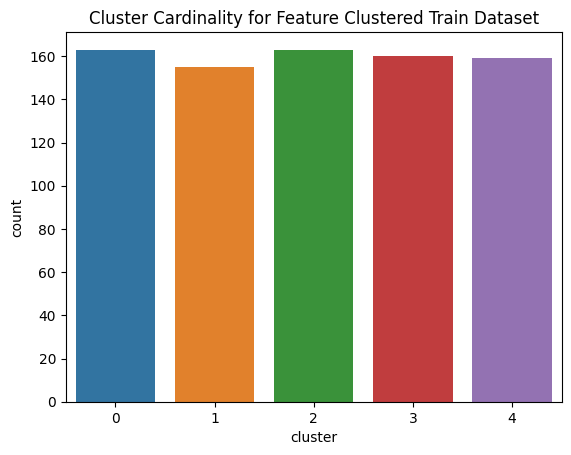

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

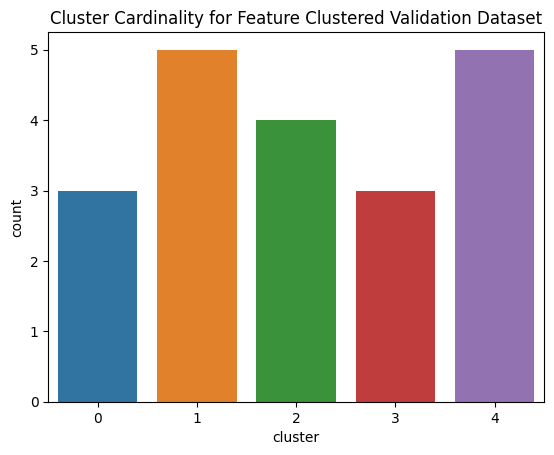

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

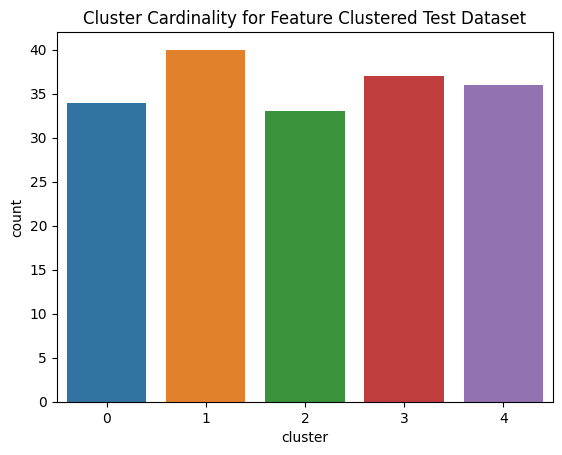

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

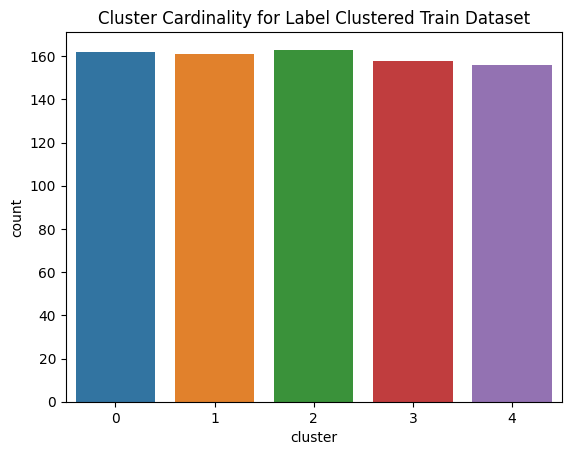

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

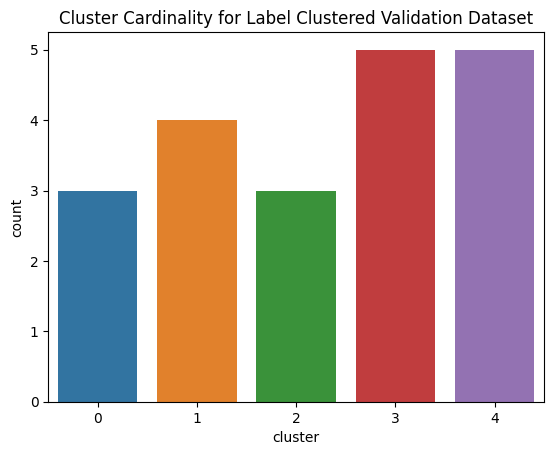

C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

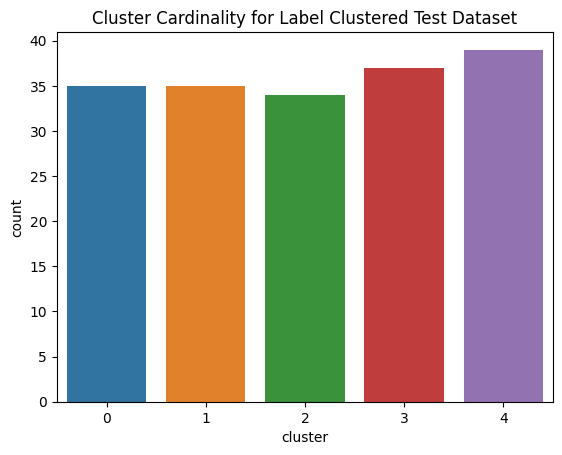

In [5]:
#split the dataset into training and testing and validation sets
def split_dataset(dataset, train_size=0.8, val_size=0.1, test_size=0.1):
    train_dataset = dataset.sample(frac=train_size)
    dataset = dataset.drop(train_dataset.index)
    val_dataset = dataset.sample(frac=val_size)
    test_dataset = dataset.drop(val_dataset.index)
    
    return train_dataset, val_dataset, test_dataset

#split the dataset for feature clustered dataset and label clustered dataset
train_dataset_feature, val_dataset_feature, test_dataset_feature = split_dataset(feature_clustered_dataset)
train_dataset_label, val_dataset_label, test_dataset_label = split_dataset(label_clustered_dataset)

#plot the cardinality of clusters within each set
sns.countplot(x='cluster', data=train_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Train Dataset')
plt.show()

sns.countplot(x='cluster', data=val_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Validation Dataset')
plt.show()

sns.countplot(x='cluster', data=test_dataset_feature)
plt.title('Cluster Cardinality for Feature Clustered Test Dataset')
plt.show()

sns.countplot(x='cluster', data=train_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Train Dataset')
plt.show()

sns.countplot(x='cluster', data=val_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Validation Dataset')
plt.show()

sns.countplot(x='cluster', data=test_dataset_label)
plt.title('Cluster Cardinality for Label Clustered Test Dataset')
plt.show()






Model and Optimizer Redefinitions

In [6]:
#Define the model architecture
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(CustomModel, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)
    
#Define the custom optimizer
class COSGD(optim.Optimizer):
    def __init__(self, params, lr):
        defaults = dict(lr=lr)
        super(COSGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                p.data.add_(-group['lr'], d_p)
        
        return loss

def flatten_grads(grads):
    grads = torch.cat([grad.view(-1) for grad in grads])
    return grads

def unflatten_grads(flattened_grads, model):
    grads = []
    start = 0
    for param in model.parameters():
        end = start + param.numel()
        grads.append(flattened_grads[start:end].view(param.size()))
        start = end
    return grads

def sort_grads(grads, sort_order=True):
    avg_abs = [torch.mean(torch.abs(grad)).item() for grad in grads]
    order = sorted(range(len(avg_abs)), key=lambda i: avg_abs[i], reverse=sort_order)
    return order

def unsort_grads(grads, order):
    unsorted_grads = [grads[i] for i in order]
    return unsorted_grads

def orthogonalize_grads(grads):
    flattened_grads = [flatten_grads(cluster_grads) for cluster_grads in grads]

    #sort the vectors by average absolute value in descending order
    order = sort_grads(flattened_grads)
    flattened_grads = [flattened_grads[i] for i in order]

    #now we have a set of vectors, we can perform the gram schmidt process
    ortho_grads = []
    for i, grad in enumerate(flattened_grads):
        for j in range(i):
            #subtract the projection of the current vector onto the previous vectors
            if torch.norm(ortho_grads[j]) != 0:
                grad = grad - (grad @ ortho_grads[j]) / (ortho_grads[j] @ ortho_grads[j]) * ortho_grads[j]
        ortho_grads.append(grad)
    #sort the vectors back to their original order
    ortho_grads = unsort_grads(ortho_grads, order)
    return ortho_grads



Control Model Definitions

In [13]:
#prepare data loader for the control model using the feature clustered dataset
features = train_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = train_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader = DataLoader(tensor_data, batch_size= (len(train_dataset_feature)), shuffle=True)

#do the same for validation
features = val_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = val_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader_val = DataLoader(tensor_data, batch_size= 32, shuffle=True)

# Define the training loop for the control model (standard)
def train_model(model, optimizer, dataloader, loss_function, epochs):
    criterion = loss_function
    model.train()
    
    val_losses = []
    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    #validate and print the loss and store each validation loss in a list
        for inputs, labels in dataloader_val:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #print('Validation Loss: ', loss.item())
            val_losses.append(loss.item())
            break
    return model, val_losses

COSGD Model

In [14]:
#get the minimum cardinality of a cluster from all the clusters in the feature clustered dataset
min_cluster_size_feature = int(min(feature_clustered_dataset['cluster'].value_counts()))

#get the minimum cardinality of a cluster from all the clusters in the label clustered dataset
min_cluster_size_label = int(min(label_clustered_dataset['cluster'].value_counts()))

# Prepare data loaders for each cluster for the feature clustered dataset
dataloaders_features = {}
for cluster in range(n_clusters):
    features = train_dataset_feature[train_dataset_feature['cluster'] == cluster].drop(['label', 'cluster'], axis=1).values
    labels = train_dataset_feature[train_dataset_feature['cluster'] == cluster]['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders_features[cluster] = DataLoader(tensor_data, batch_size=min_cluster_size_feature, shuffle=True)

# Prepare data loaders for each cluster for the label clustered dataset
dataloaders_labels = {}
for cluster in range(n_clusters):
    features = train_dataset_label[train_dataset_label['cluster'] == cluster].drop(['label', 'cluster'], axis=1).values
    labels = train_dataset_label[train_dataset_label['cluster'] == cluster]['label'].values
    tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
    dataloaders_labels[cluster] = DataLoader(tensor_data, batch_size=min_cluster_size_label, shuffle=True)

#train the model using COSGD, this method will train the model over each cluster without updating the model parameters. It will store each 
#clusters gradient updates in a list and then orthogonalize the gradients. The orthogonalized gradients will then be used to update the model 
# parameters by applying each set of orthogonalized gradients to the model parameters
def train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs):
    criterion = loss_function
    model.train()
    
    
    val_losses = []
    for epoch in range(epochs):
        grads = []
        for cluster, dataloader in dataloaders.items():
            optimizer.zero_grad()
            for inputs, labels in dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                grads.append([param.grad.clone() for param in model.parameters()])
                break       
            
        #orthogonalize the gradients
        grads = orthogonalize_grads(grads)
        grads = [unflatten_grads(grad, model) for grad in grads]

        #create 1 vector from the list of gradients which is the sum of each cluster's gradients
        for i in range(len(grads)):
            if i == 0:
                sum_grads = grads[i]
            else:
                for j in range(len(grads[i])):
                    sum_grads[j] += grads[i][j]
        
        #update the model parameters with the sum of the gradients
        for param, g in zip(model.parameters(), sum_grads):
                param.grad = g
        optimizer.step()

        #validate and return the loss in a list for each epoch
        for inputs, labels in dataloader_val:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            #print('Validation Loss: ', loss.item())
            val_losses.append(loss.item())
            break
    return model, val_losses


Train the models and present all visualizations

In [15]:
# Define model architectures
input_size = dataset.shape[1] - 2  # excluding label and cluster columns
hidden_layers_simple = [(input_size*2)]
hidden_layers_complex = [(input_size*2), (input_size*2)]
output_size = 1
model_control_simple = CustomModel(input_size, hidden_layers_simple, output_size)
model_cosgd_simple = CustomModel(input_size, hidden_layers_simple, output_size)
model_control_complex = CustomModel(input_size, hidden_layers_complex, output_size)
model_cosgd_complex = CustomModel(input_size, hidden_layers_complex, output_size)

# Define optimizers, Case1: lr=0.1 Case2: lr=0.01 Case3: lr=0.001
simple_optimizer_control_case1 = optim.SGD(model_control_simple.parameters(), lr=0.1)
simple_optimizer_cosgd_case1 = COSGD(model_cosgd_simple.parameters(), lr=0.1)
simple_optimizer_control_case2 = optim.SGD(model_control_simple.parameters(), lr=0.01)
simple_optimizer_cosgd_case2 = COSGD(model_cosgd_simple.parameters(), lr=0.01)
simple_optimizer_control_case3 = optim.SGD(model_control_simple.parameters(), lr=0.001)
simple_optimizer_cosgd_case3 = COSGD(model_cosgd_simple.parameters(), lr=0.001)
complex_optimizer_control_case1 = optim.SGD(model_control_complex.parameters(), lr=0.1)  
complex_optimizer_cosgd_case1 = COSGD(model_cosgd_complex.parameters(), lr=0.1)
complex_optimizer_control_case2 = optim.SGD(model_control_complex.parameters(), lr=0.01)
complex_optimizer_cosgd_case2 = COSGD(model_cosgd_complex.parameters(), lr=0.01)
complex_optimizer_control_case3 = optim.SGD(model_control_complex.parameters(), lr=0.001)
complex_optimizer_cosgd_case3 = COSGD(model_cosgd_complex.parameters(), lr=0.001)


#create loss function using mae
loss_function = nn.L1Loss()

# Prepare data loaders for testing the models, using feature clustered dataset
features = test_dataset_feature.drop(['label', 'cluster'], axis=1).values
labels = test_dataset_feature['label'].values
tensor_data = TensorDataset(torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
dataloader = DataLoader(tensor_data, batch_size=1, shuffle=True)

#evaluate both models over the test set recording the MAE and MSE
def evaluate_model(model, dataloader):
    model.eval()
    mae = 0
    mse = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            mae += torch.sum(torch.abs(outputs - labels)).item()
            mse += torch.sum((outputs - labels) ** 2).item()
    mae /= len(dataloader.dataset)
    mse /= len(dataloader.dataset)
    return mae, mse

#train and test the models
def train_and_test_cosgd(model, optimizer, dataloaders, loss_function, epochs, n_runs):
    training_times = []
    val_losses = []
    test_maes = []
    test_mses = []
    for run in range(n_runs):
        start_time = time.time()
        model, val_loss = train_model_cosgd(model, optimizer, dataloaders, loss_function, epochs)
        training_time = time.time() - start_time
        mae, mse = evaluate_model(model, dataloader)
        training_times.append(training_time)
        val_losses.append(val_loss)
        test_maes.append(mae)
        test_mses.append(mse)
        print(f"Run {run+1} completed")
    return training_times, val_losses, test_maes, test_mses

#now for control model
def train_and_test_control(model, optimizer, dataloader, loss_function, epochs, n_runs):
    training_times = []
    val_losses = []
    test_maes = []
    test_mses = []
    for run in range(n_runs):
        start_time = time.time()
        model, val_loss = train_model(model, optimizer, dataloader, loss_function, epochs)
        training_time = time.time() - start_time
        mae, mse = evaluate_model(model, dataloader)
        training_times.append(training_time)
        val_losses.append(val_loss)
        test_maes.append(mae)
        test_mses.append(mse)
        print(f"Run {run+1} completed")
    return training_times, val_losses, test_maes, test_mses


Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Simple Control Case 1
Training Tim

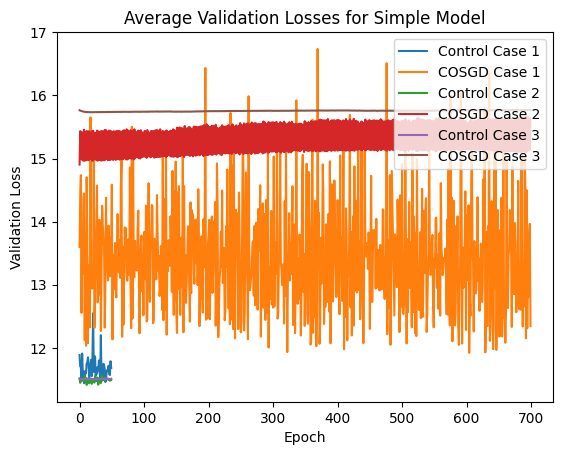

In [ ]:
#train and test the simple control and cosgd models
n_runs = 10
epochs = 700
training_times_control_simple_case1, val_losses_control_simple_case1, test_maes_control_simple_case1, test_mses_control_simple_case1 = train_and_test_control(model_control_simple, simple_optimizer_control_case1, dataloader, loss_function, 50, n_runs)
training_times_cosgd_simple_case1, val_losses_cosgd_simple_case1, test_maes_cosgd_simple_case1, test_mses_cosgd_simple_case1 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case1, dataloaders_features, loss_function, epochs, n_runs)
training_times_control_simple_case2, val_losses_control_simple_case2, test_maes_control_simple_case2, test_mses_control_simple_case2 = train_and_test_control(model_control_simple, simple_optimizer_control_case2, dataloader, loss_function, 50, n_runs)
training_times_cosgd_simple_case2, val_losses_cosgd_simple_case2, test_maes_cosgd_simple_case2, test_mses_cosgd_simple_case2 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case2, dataloaders_features, loss_function, epochs, n_runs)
training_times_control_simple_case3, val_losses_control_simple_case3, test_maes_control_simple_case3, test_mses_control_simple_case3 = train_and_test_control(model_control_simple, simple_optimizer_control_case3, dataloader, loss_function, 50, n_runs)
training_times_cosgd_simple_case3, val_losses_cosgd_simple_case3, test_maes_cosgd_simple_case3, test_mses_cosgd_simple_case3 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case3, dataloaders_features, loss_function, epochs, n_runs)

#print out all the results and format
print("Simple Control Case 1")
print("Training Times: ", training_times_control_simple_case1)
print("Validation Losses: ", val_losses_control_simple_case1)
print("Test MAEs: ", test_maes_control_simple_case1)
print("Test MSEs: ", test_mses_control_simple_case1)
print("Simple COSGD Case 1")
print("Training Times: ", training_times_cosgd_simple_case1)
print("Validation Losses: ", val_losses_cosgd_simple_case1)
print("Test MAEs: ", test_maes_cosgd_simple_case1)
print("Test MSEs: ", test_mses_cosgd_simple_case1)
print("Simple Control Case 2")
print("Training Times: ", training_times_control_simple_case2)
print("Validation Losses: ", val_losses_control_simple_case2)
print("Test MAEs: ", test_maes_control_simple_case2)
print("Test MSEs: ", test_mses_control_simple_case2)
print("Simple COSGD Case 2")
print("Training Times: ", training_times_cosgd_simple_case2)
print("Validation Losses: ", val_losses_cosgd_simple_case2)
print("Test MAEs: ", test_maes_cosgd_simple_case2)
print("Test MSEs: ", test_mses_cosgd_simple_case2)
print("Simple Control Case 3")
print("Training Times: ", training_times_control_simple_case3)
print("Validation Losses: ", val_losses_control_simple_case3)
print("Test MAEs: ", test_maes_control_simple_case3)
print("Test MSEs: ", test_mses_control_simple_case3)
print("Simple COSGD Case 3")
print("Training Times: ", training_times_cosgd_simple_case3)
print("Validation Losses: ", val_losses_cosgd_simple_case3)
print("Test MAEs: ", test_maes_cosgd_simple_case3)
print("Test MSEs: ", test_mses_cosgd_simple_case3)

#plot a line graph of the average validation losses for each epoch for each model
plt.plot(np.mean(val_losses_control_simple_case1, axis=0))
plt.plot(np.mean(val_losses_cosgd_simple_case1, axis=0))
plt.plot(np.mean(val_losses_control_simple_case2, axis=0))
plt.plot(np.mean(val_losses_cosgd_simple_case2, axis=0))
plt.plot(np.mean(val_losses_control_simple_case3, axis=0))
plt.plot(np.mean(val_losses_cosgd_simple_case3, axis=0))
plt.title('Average Validation Losses for Simple Model')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Control Case 1', 'COSGD Case 1', 'Control Case 2', 'COSGD Case 2', 'Control Case 3', 'COSGD Case 3'], loc='upper right')
plt.show()




C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Run 1 completed


C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([159])) that is different to the input size (torch.Size([159, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([162])) that is different to the input size (torch.Size([162, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

Run 1 completed
Run 1 completed
Run 1 completed
Run 1 completed
Run 1 completed
Complex Control Case 1
Training Times:  [2.4846930503845215]
Validation Losses:  [[53.03376770019531, 35.033782958984375, 19.267221450805664, 12.606836318969727, 11.686846733093262, 11.006860733032227, 11.109709739685059, 11.169708251953125, 11.049712181091309, 11.109709739685059, 11.006858825683594, 11.049712181091309, 11.006858825683594, 11.109709739685059, 11.049710273742676, 11.109710693359375, 11.049712181091309, 11.109709739685059, 11.049712181091309, 11.006857872009277, 11.006857872009277, 11.006858825683594, 11.006858825683594, 11.109709739685059, 11.006858825683594, 11.049710273742676, 11.006857872009277, 11.049712181091309, 11.169709205627441, 11.046857833862305, 11.04970932006836, 11.049710273742676, 11.006860733032227, 11.049712181091309, 11.006858825683594, 11.049712181091309, 11.006858825683594, 11.049710273742676, 11.049710273742676, 11.006857872009277, 11.049710273742676, 11.006857872009277,

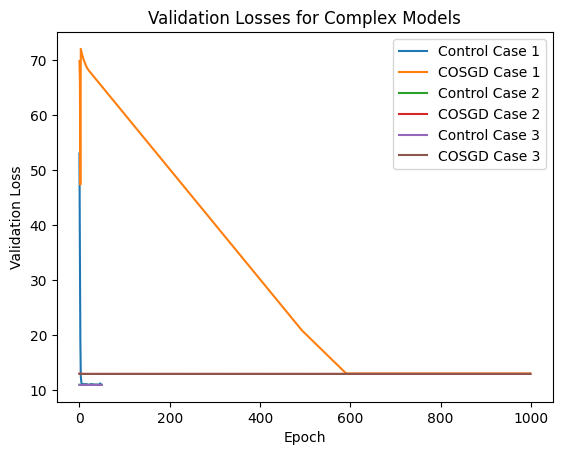

In [ ]:
#Train and test the complex control and cosgd models
n_runs = 1
epochs = 1000
training_times_control_complex_case1, val_losses_control_complex_case1, test_maes_control_complex_case1, test_mses_control_complex_case1 = train_and_test_control(model_control_complex, complex_optimizer_control_case1, dataloader, loss_function, 50, n_runs)
training_times_cosgd_complex_case1, val_losses_cosgd_complex_case1, test_maes_cosgd_complex_case1, test_mses_cosgd_complex_case1 = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case1, dataloaders_features, loss_function, epochs, n_runs)
training_times_control_complex_case2, val_losses_control_complex_case2, test_maes_control_complex_case2, test_mses_control_complex_case2 = train_and_test_control(model_control_complex, complex_optimizer_control_case2, dataloader, loss_function, 50, n_runs)
training_times_cosgd_complex_case2, val_losses_cosgd_complex_case2, test_maes_cosgd_complex_case2, test_mses_cosgd_complex_case2 = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case2, dataloaders_features, loss_function, epochs, n_runs)
training_times_control_complex_case3, val_losses_control_complex_case3, test_maes_control_complex_case3, test_mses_control_complex_case3 = train_and_test_control(model_control_complex, complex_optimizer_control_case3, dataloader, loss_function, 50, n_runs)
training_times_cosgd_complex_case3, val_losses_cosgd_complex_case3, test_maes_cosgd_complex_case3, test_mses_cosgd_complex_case3 = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case3, dataloaders_features, loss_function, epochs, n_runs)

#print out all the results and format
print("Complex Control Case 1")
print("Training Times: ", training_times_control_complex_case1)
print("Validation Losses: ", val_losses_control_complex_case1)
print("Test MAEs: ", test_maes_control_complex_case1)
print("Test MSEs: ", test_mses_control_complex_case1)
print("Complex COSGD Case 1")
print("Training Times: ", training_times_cosgd_complex_case1)
print("Validation Losses: ", val_losses_cosgd_complex_case1)
print("Test MAEs: ", test_maes_cosgd_complex_case1)
print("Test MSEs: ", test_mses_cosgd_complex_case1)
print("Complex Control Case 2")
print("Training Times: ", training_times_control_complex_case2)
print("Validation Losses: ", val_losses_control_complex_case2)
print("Test MAEs: ", test_maes_control_complex_case2)
print("Test MSEs: ", test_mses_control_complex_case2)
print("Complex COSGD Case 2")
print("Training Times: ", training_times_cosgd_complex_case2)
print("Validation Losses: ", val_losses_cosgd_complex_case2)
print("Test MAEs: ", test_maes_cosgd_complex_case2)
print("Test MSEs: ", test_mses_cosgd_complex_case2)
print("Complex Control Case 3")
print("Training Times: ", training_times_control_complex_case3)
print("Validation Losses: ", val_losses_control_complex_case3)
print("Test MAEs: ", test_maes_control_complex_case3)

print("Test MSEs: ", test_mses_control_complex_case3)
print("Complex COSGD Case 3")
print("Training Times: ", training_times_cosgd_complex_case3)
print("Validation Losses: ", val_losses_cosgd_complex_case3)
print("Test MAEs: ", test_maes_cosgd_complex_case3)
print("Test MSEs: ", test_mses_cosgd_complex_case3)

#plot a line graph of the average validation losses for each epoch for each model
plt.plot(val_losses_control_complex_case1[0], label='Control Case 1')
plt.plot(val_losses_cosgd_complex_case1[0], label='COSGD Case 1')
plt.plot(val_losses_control_complex_case2[0], label='Control Case 2')
plt.plot(val_losses_cosgd_complex_case2[0], label='COSGD Case 2')
plt.plot(val_losses_control_complex_case3[0], label='Control Case 3')
plt.plot(val_losses_cosgd_complex_case3[0], label='COSGD Case 3')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Losses for Complex Models')
plt.show()



C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Control Model Case1 completed


C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([163])) that is different to the input size (torch.Size([163, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([155])) that is different to the input size (torch.Size([155, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rayde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
COSGD Model Case1 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Control Model Case2 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
COSGD Model Case2 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
Control Model Case3 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed
Run 5 completed
Run 6 completed
Run 7 completed
Run 8 completed
Run 9 completed
Run 10 completed
COSGD Model Case3 completed
Run 1 completed
Run 2 completed
Run 3 completed
Run

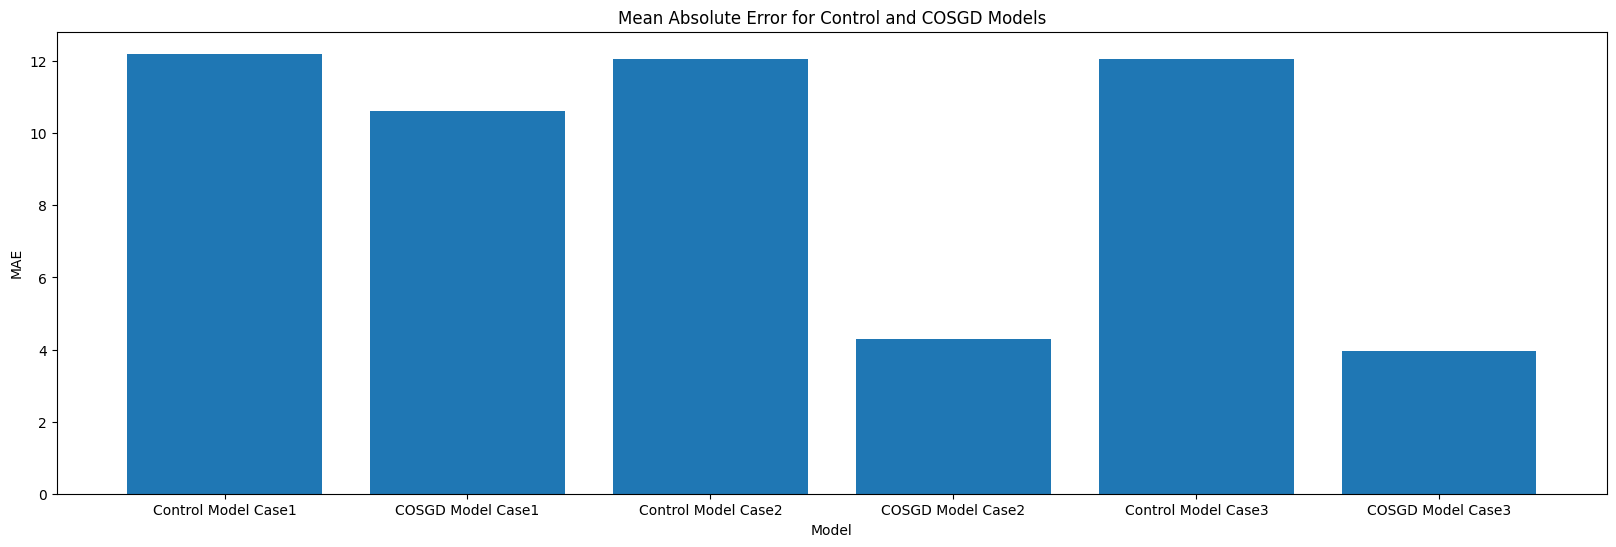

{'Control Model Case1': 12.20450037850274, 'COSGD Model Case1': 10.623738267686631, 'Control Model Case2': 12.06848117404514, 'COSGD Model Case2': 4.300849696265327, 'Control Model Case3': 12.056496035257975, 'COSGD Model Case3': 3.9568569564819334}


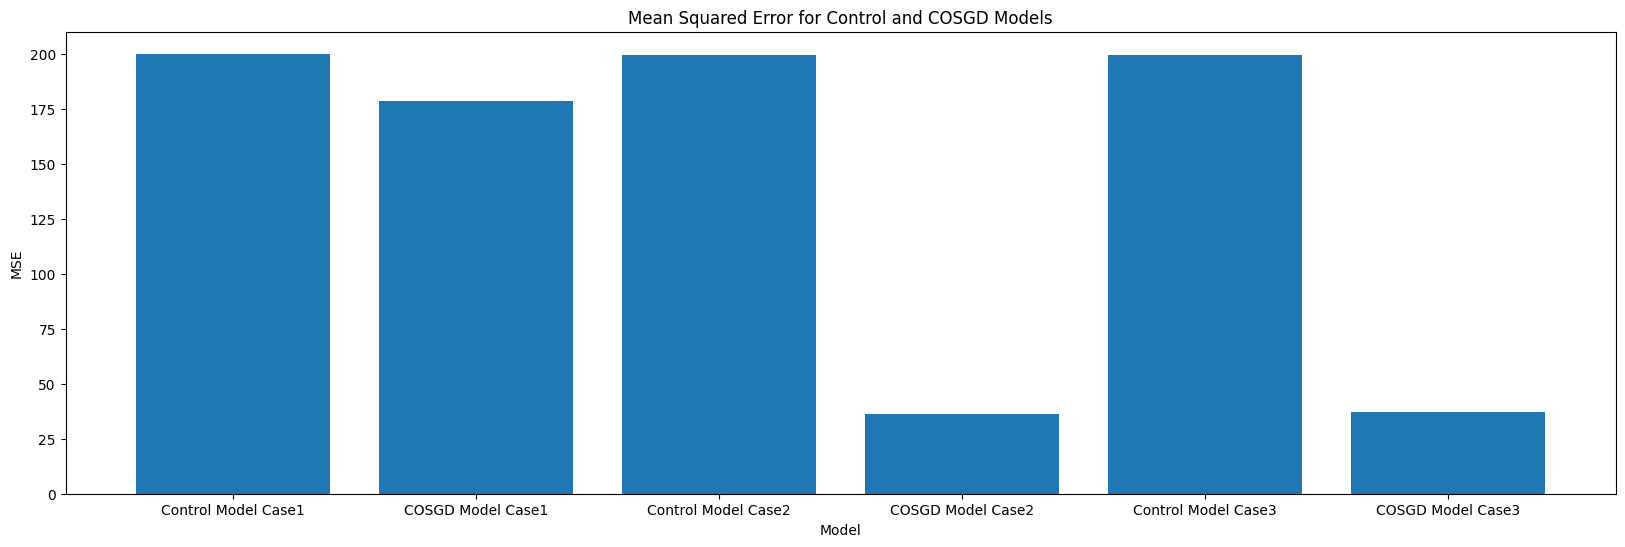

{'Control Model Case1': 200.18084242170315, 'COSGD Model Case1': 178.76484520254706, 'Control Model Case2': 199.44427142875838, 'COSGD Model Case2': 36.22420774405762, 'Control Model Case3': 199.44465434769708, 'COSGD Model Case3': 37.02474031701013}


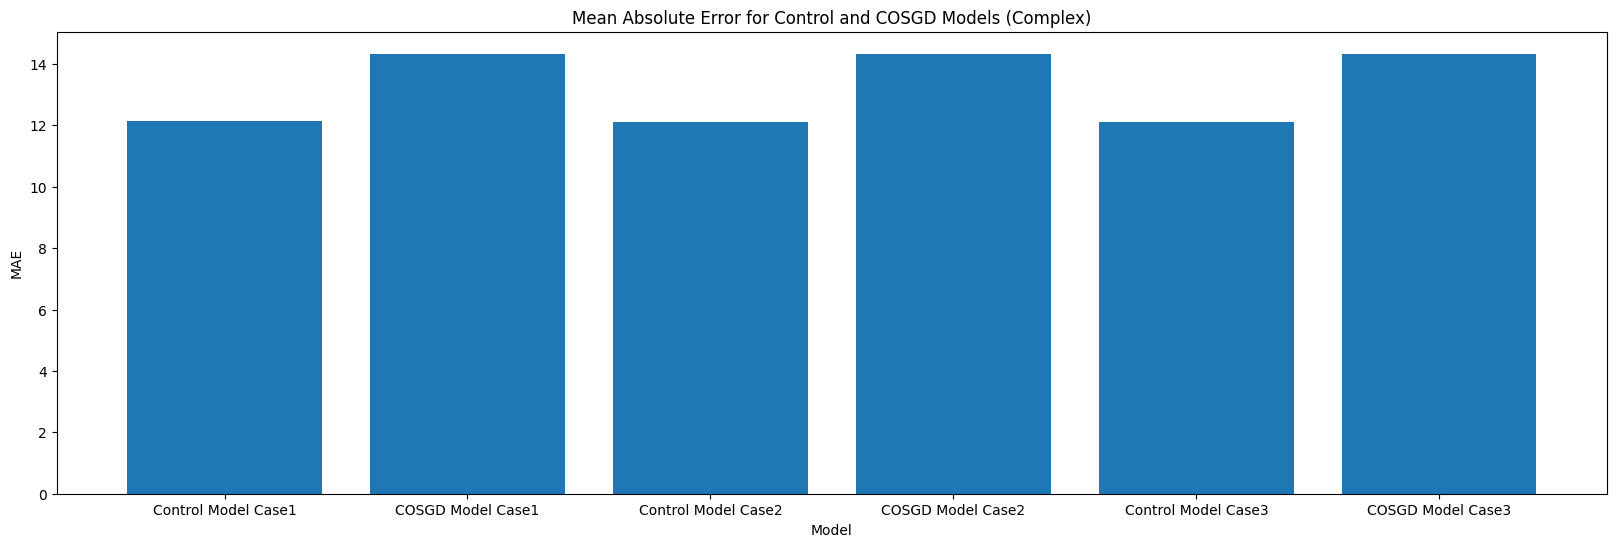

{'Control Model Case1': 12.141825900607639, 'COSGD Model Case1': 14.32899898952908, 'Control Model Case2': 12.115813225640192, 'COSGD Model Case2': 14.333639526367188, 'Control Model Case3': 12.111408996582032, 'COSGD Model Case3': 14.333639526367188}


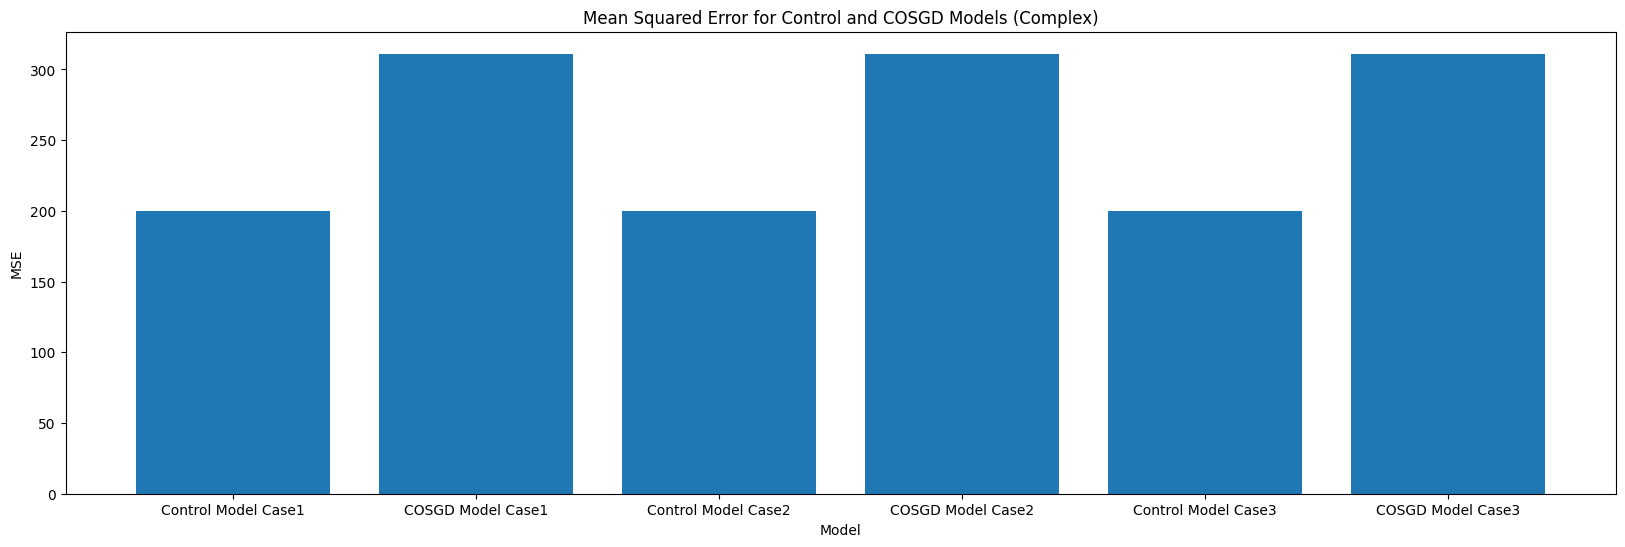

{'Control Model Case1': 200.08234721948082, 'COSGD Model Case1': 310.69972004705727, 'Control Model Case2': 200.00480010095492, 'COSGD Model Case2': 311.12150298829164, 'Control Model Case3': 199.998559105411, 'COSGD Model Case3': 311.12150298829164}


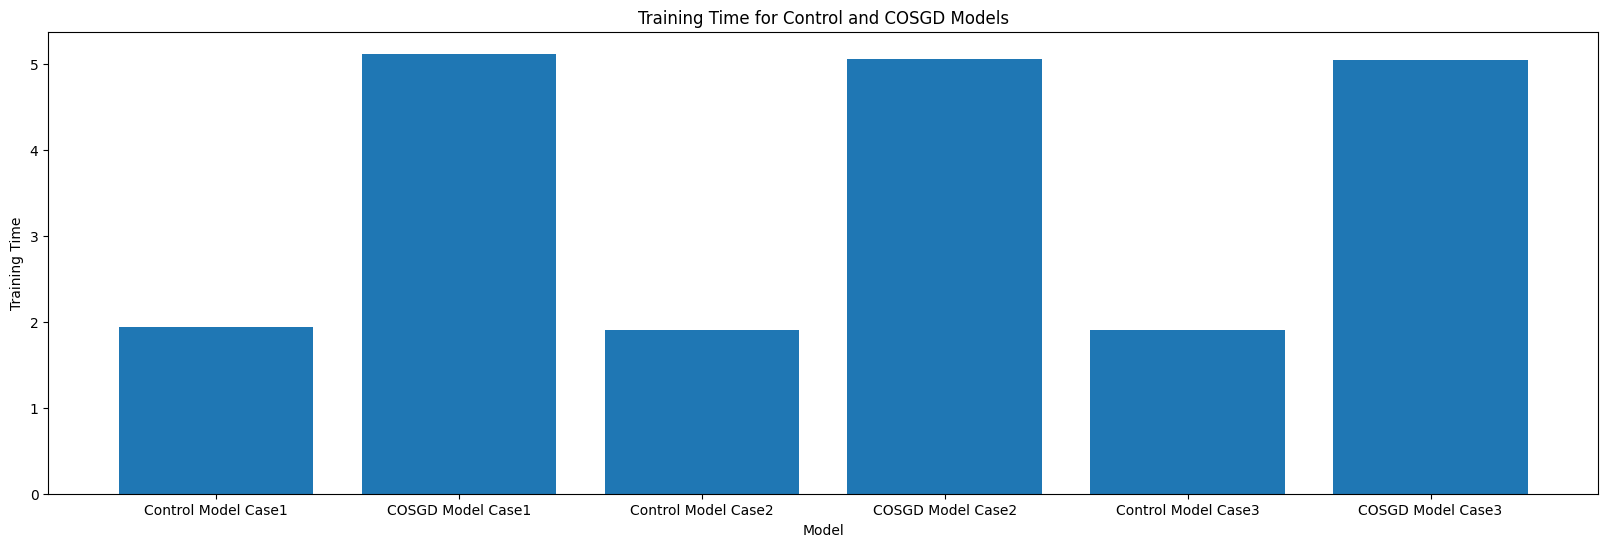

{'Control Model Case1': 1.941625213623047, 'COSGD Model Case1': 5.12221930027008, 'Control Model Case2': 1.9007675409317017, 'COSGD Model Case2': 5.055989789962768, 'Control Model Case3': 1.911747932434082, 'COSGD Model Case3': 5.052530002593994}


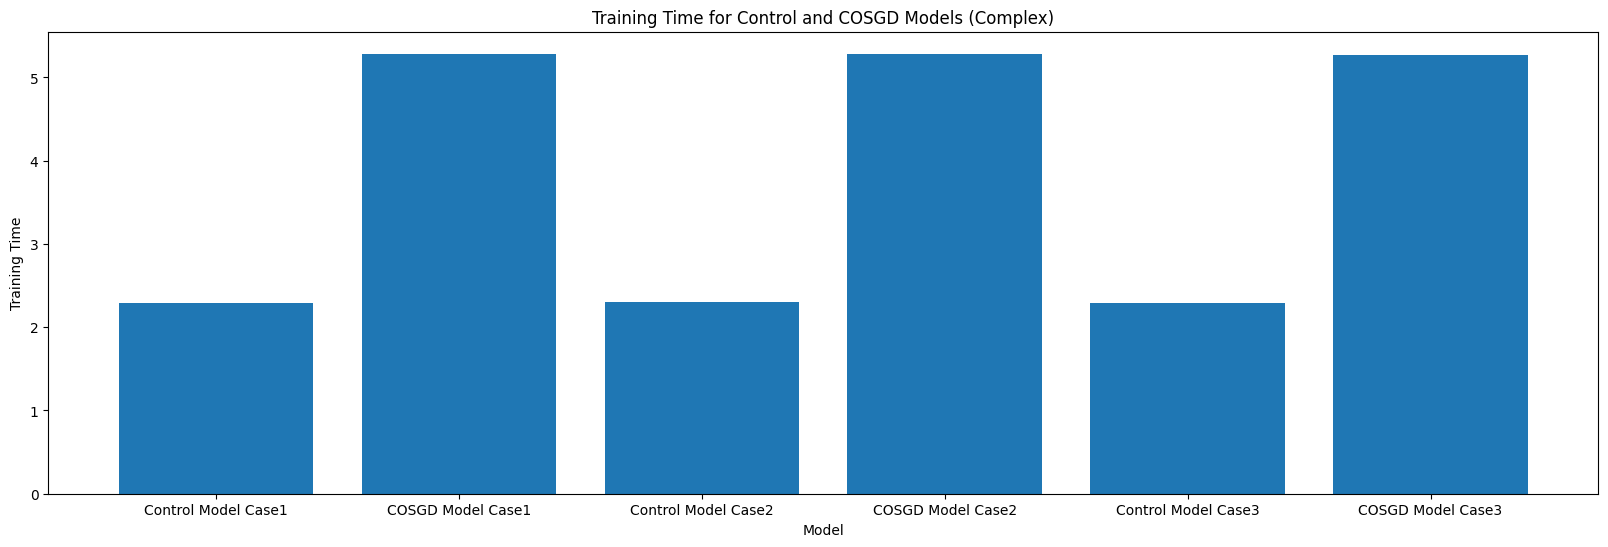

{'Control Model Case1': 2.2953248500823973, 'COSGD Model Case1': 5.2845460176467896, 'Control Model Case2': 2.301217555999756, 'COSGD Model Case2': 5.276613068580628, 'Control Model Case3': 2.295535707473755, 'COSGD Model Case3': 5.270271277427673}


<Figure size 2000x600 with 0 Axes>

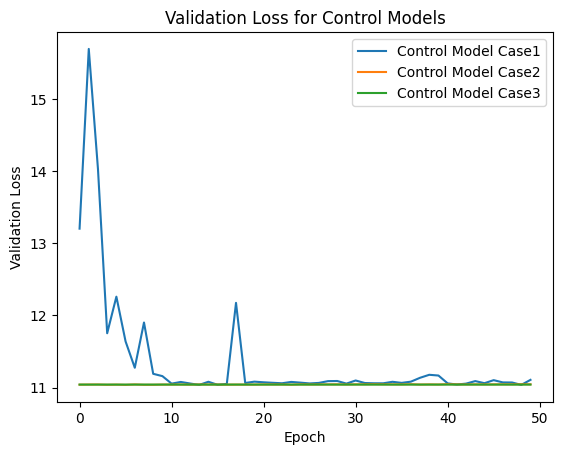

<Figure size 2000x600 with 0 Axes>

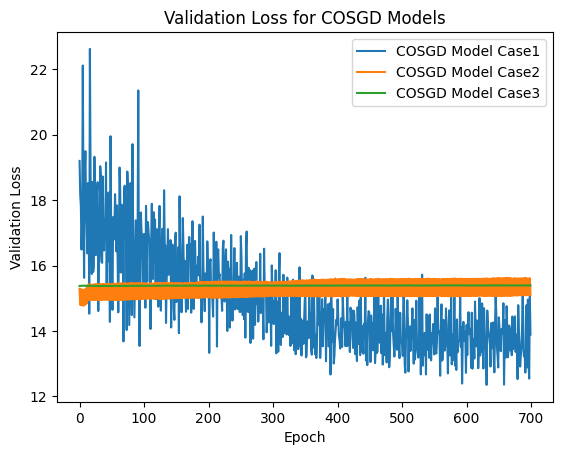

<Figure size 2000x600 with 0 Axes>

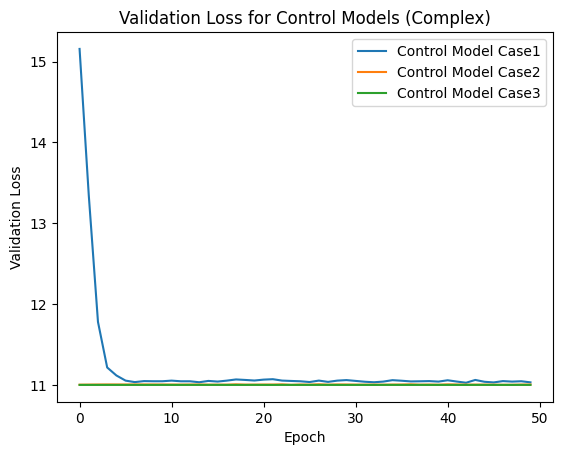

<Figure size 2000x600 with 0 Axes>

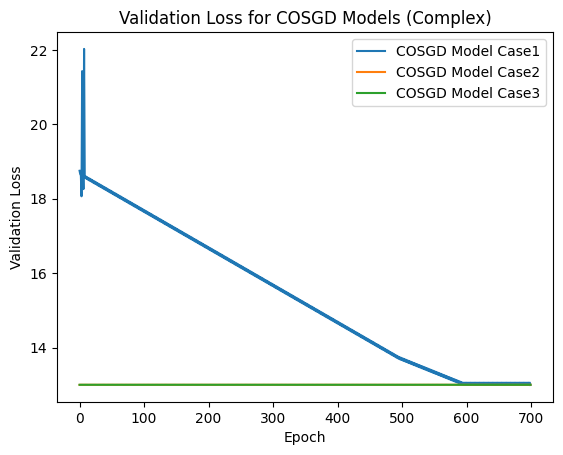

In [16]:
#train and test each model
n_runs = 10
epochs = 700
training_times_control_case1, val_losses_control_case1, test_maes_control_case1, test_mses_control_case1 = train_and_test_control(model_control_simple, simple_optimizer_control_case1, dataloader, loss_function, 50, n_runs)
print("Control Model Case1 completed")
training_times_cosgd_case1, val_losses_cosgd_case1, test_maes_cosgd_case1, test_mses_cosgd_case1 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case1, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case1 completed")
training_times_control_case2, val_losses_control_case2, test_maes_control_case2, test_mses_control_case2 = train_and_test_control(model_control_simple, simple_optimizer_control_case2, dataloader, loss_function, 50, n_runs)
print("Control Model Case2 completed")
training_times_cosgd_case2, val_losses_cosgd_case2, test_maes_cosgd_case2, test_mses_cosgd_case2 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case2, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case2 completed")
training_times_control_case3, val_losses_control_case3, test_maes_control_case3, test_mses_control_case3 = train_and_test_control(model_control_simple, simple_optimizer_control_case3, dataloader, loss_function, 50, n_runs)
print("Control Model Case3 completed")
training_times_cosgd_case3, val_losses_cosgd_case3, test_maes_cosgd_case3, test_mses_cosgd_case3 = train_and_test_cosgd(model_cosgd_simple, simple_optimizer_cosgd_case3, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case3 completed")
training_times_control_case1_complex, val_losses_control_case1_complex, test_maes_control_case1_complex, test_mses_control_case1_complex = train_and_test_control(model_control_complex, complex_optimizer_control_case1, dataloader, loss_function, 50, n_runs)
print("Control Model Case1 Complex completed")
training_times_cosgd_case1_complex, val_losses_cosgd_case1_complex, test_maes_cosgd_case1_complex, test_mses_cosgd_case1_complex = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case1, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case1 Complex completed")
training_times_control_case2_complex, val_losses_control_case2_complex, test_maes_control_case2_complex, test_mses_control_case2_complex = train_and_test_control(model_control_complex, complex_optimizer_control_case2, dataloader, loss_function, 50, n_runs)
print("Control Model Case2 Complex completed")
training_times_cosgd_case2_complex, val_losses_cosgd_case2_complex, test_maes_cosgd_case2_complex, test_mses_cosgd_case2_complex = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case2, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case2 Complex completed")
training_times_control_case3_complex, val_losses_control_case3_complex, test_maes_control_case3_complex, test_mses_control_case3_complex = train_and_test_control(model_control_complex, complex_optimizer_control_case3, dataloader, loss_function, 50, n_runs)
print("Control Model Case3 Complex completed")
training_times_cosgd_case3_complex, val_losses_cosgd_case3_complex, test_maes_cosgd_case3_complex, test_mses_cosgd_case3_complex = train_and_test_cosgd(model_cosgd_complex, complex_optimizer_cosgd_case3, dataloaders_features, loss_function, epochs, n_runs)
print("COSGD Model Case3 Complex completed")

plt.figure(figsize=(20, 6))
#have the bar graph use different colors for each model
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(test_maes_control_case1), np.mean(test_maes_cosgd_case1), np.mean(test_maes_control_case2), np.mean(test_maes_cosgd_case2), np.mean(test_maes_control_case3), np.mean(test_maes_cosgd_case3)])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error for Control and COSGD Models')
plt.show()
print({'Control Model Case1': np.mean(test_maes_control_case1), 'COSGD Model Case1': np.mean(test_maes_cosgd_case1), 'Control Model Case2': np.mean(test_maes_control_case2), 'COSGD Model Case2': np.mean(test_maes_cosgd_case2), 'Control Model Case3': np.mean(test_maes_control_case3), 'COSGD Model Case3': np.mean(test_maes_cosgd_case3)})

plt.figure(figsize=(20, 6))
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(test_mses_control_case1), np.mean(test_mses_cosgd_case1), np.mean(test_mses_control_case2), np.mean(test_mses_cosgd_case2), np.mean(test_mses_control_case3), np.mean(test_mses_cosgd_case3)])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Control and COSGD Models')
plt.show()
print({'Control Model Case1': np.mean(test_mses_control_case1), 'COSGD Model Case1': np.mean(test_mses_cosgd_case1), 'Control Model Case2': np.mean(test_mses_control_case2), 'COSGD Model Case2': np.mean(test_mses_cosgd_case2), 'Control Model Case3': np.mean(test_mses_control_case3), 'COSGD Model Case3': np.mean(test_mses_cosgd_case3)})

#plot complex models
plt.figure(figsize=(20, 6))
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(test_maes_control_case1_complex), np.mean(test_maes_cosgd_case1_complex), np.mean(test_maes_control_case2_complex), np.mean(test_maes_cosgd_case2_complex), np.mean(test_maes_control_case3_complex), np.mean(test_maes_cosgd_case3_complex)])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error for Control and COSGD Models (Complex)')
plt.show()
print({'Control Model Case1': np.mean(test_maes_control_case1_complex), 'COSGD Model Case1': np.mean(test_maes_cosgd_case1_complex), 'Control Model Case2': np.mean(test_maes_control_case2_complex), 'COSGD Model Case2': np.mean(test_maes_cosgd_case2_complex), 'Control Model Case3': np.mean(test_maes_control_case3_complex), 'COSGD Model Case3': np.mean(test_maes_cosgd_case3_complex)})

plt.figure(figsize=(20, 6))
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(test_mses_control_case1_complex), np.mean(test_mses_cosgd_case1_complex), np.mean(test_mses_control_case2_complex), np.mean(test_mses_cosgd_case2_complex), np.mean(test_mses_control_case3_complex), np.mean(test_mses_cosgd_case3_complex)])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error for Control and COSGD Models (Complex)')
plt.show()
print({'Control Model Case1': np.mean(test_mses_control_case1_complex), 'COSGD Model Case1': np.mean(test_mses_cosgd_case1_complex), 'Control Model Case2': np.mean(test_mses_control_case2_complex), 'COSGD Model Case2': np.mean(test_mses_cosgd_case2_complex), 'Control Model Case3': np.mean(test_mses_control_case3_complex), 'COSGD Model Case3': np.mean(test_mses_cosgd_case3_complex)})

#plot the training times for each model and case
plt.figure(figsize=(20, 6))
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(training_times_control_case1), np.mean(training_times_cosgd_case1), np.mean(training_times_control_case2), np.mean(training_times_cosgd_case2), np.mean(training_times_control_case3), np.mean(training_times_cosgd_case3)])
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Training Time for Control and COSGD Models')
plt.show()
print({'Control Model Case1': np.mean(training_times_control_case1), 'COSGD Model Case1': np.mean(training_times_cosgd_case1), 'Control Model Case2': np.mean(training_times_control_case2), 'COSGD Model Case2': np.mean(training_times_cosgd_case2), 'Control Model Case3': np.mean(training_times_control_case3), 'COSGD Model Case3': np.mean(training_times_cosgd_case3)})

#plot the training times for each model and case
plt.figure(figsize=(20, 6))
plt.bar(['Control Model Case1', 'COSGD Model Case1', 'Control Model Case2', 'COSGD Model Case2', 'Control Model Case3', 'COSGD Model Case3'], [np.mean(training_times_control_case1_complex), np.mean(training_times_cosgd_case1_complex), np.mean(training_times_control_case2_complex), np.mean(training_times_cosgd_case2_complex), np.mean(training_times_control_case3_complex), np.mean(training_times_cosgd_case3_complex)])
plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Training Time for Control and COSGD Models (Complex)')
plt.show()
print({'Control Model Case1': np.mean(training_times_control_case1_complex), 'COSGD Model Case1': np.mean(training_times_cosgd_case1_complex), 'Control Model Case2': np.mean(training_times_control_case2_complex), 'COSGD Model Case2': np.mean(training_times_cosgd_case2_complex), 'Control Model Case3': np.mean(training_times_control_case3_complex), 'COSGD Model Case3': np.mean(training_times_cosgd_case3_complex)})

#plot the validation losses for the control models only
plt.figure(figsize=(20, 6))
val_losses_df = pd.DataFrame({'Control Model Case1': np.mean(val_losses_control_case1, axis=0), 'Control Model Case2': np.mean(val_losses_control_case2, axis=0), 'Control Model Case3': np.mean(val_losses_control_case3, axis=0)})
val_losses_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Control Models')
plt.show()

#plot the validation losses for the cosgd models only
plt.figure(figsize=(20, 6))
val_losses_df = pd.DataFrame({'COSGD Model Case1': np.mean(val_losses_cosgd_case1, axis=0), 'COSGD Model Case2': np.mean(val_losses_cosgd_case2, axis=0), 'COSGD Model Case3': np.mean(val_losses_cosgd_case3, axis=0)})
val_losses_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for COSGD Models')
plt.show()



#same for complex models
plt.figure(figsize=(20, 6))
val_losses_df = pd.DataFrame({'Control Model Case1': np.mean(val_losses_control_case1_complex, axis=0), 'Control Model Case2': np.mean(val_losses_control_case2_complex, axis=0), 'Control Model Case3': np.mean(val_losses_control_case3_complex, axis=0)})
val_losses_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Control Models (Complex)')
plt.show()

plt.figure(figsize=(20, 6))
val_losses_df = pd.DataFrame({'COSGD Model Case1': np.mean(val_losses_cosgd_case1_complex, axis=0), 'COSGD Model Case2': np.mean(val_losses_cosgd_case2_complex, axis=0), 'COSGD Model Case3': np.mean(val_losses_cosgd_case3_complex, axis=0)})
val_losses_df.plot()
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for COSGD Models (Complex)')
plt.show()



